# Affine Transformationen mit Scipy
In diesem Abschnitt zeigen wir, wie man eine affine Transformation mit [scipy](https://scipy.org) anwendet.


In [1]:
import numpy as np
from skimage.io import imread, imshow
from scipy import ndimage as ndi

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

(192, 256, 256)

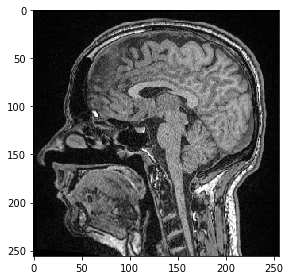

In [3]:
imshow(image[100])
image.shape

[Affine Transformationen](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation) werden typischerweise mit Transformationsmatrizen definiert.

Zum Beispiel können wir einen Skalierungsfaktor in eine solche Matrix wie folgt eingeben. Üblicherweise wird die inverse Transformation in diesen Matrizen verwaltet. Im Falle der Skalierung müssen wir einen Skalierungsfaktor von `0,5` eingeben, wenn wir die Bildgröße um den Faktor `2` vergrößern möchten. Der Grund dafür ist, dass die affine Transformationsmatrix die Transformation definiert, die von jedem Pixel im Zielbild auf jedes Pixel im Quellbild angewendet werden muss. Wenn das Zielbild doppelt so groß ist wie das Quellbild, müssen wir die Zielbildkoordinaten mit `0,5` multiplizieren, um die entsprechenden Quellbildkoordinaten zu bestimmen.

In [4]:
# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

Bevor wir die Transformation anwenden, müssen wir auch die Größe (Form) des Ausgabebildes berechnen und dieses Ausgabebild erstellen:

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
scaled = np.ndarray(output_shape)
scaled.shape

(384, 512, 512)

In [6]:
result = ndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)

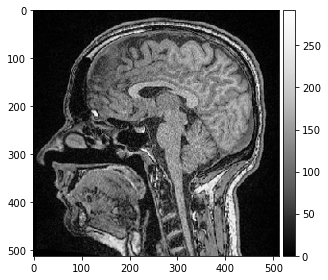

In [7]:
imshow(scaled[200], cmap="Greys_r", vmin=0)